Heart Disease Prediction Model

---
Janhavi Gaikwad UEC2021125

Sanika Gandhi UEC2021125


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


Data Collection and Processing

In [ ]:
heart_data = pd.read_csv('/content/heart_disease_data.csv')

In [ ]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
heart_data.shape

(303, 14)

Data Visualisation

In [ ]:
import matplotlib.pyplot as plt


Text(0.5, 1.0, 'Scatter Plot of Cholesterol with Target')

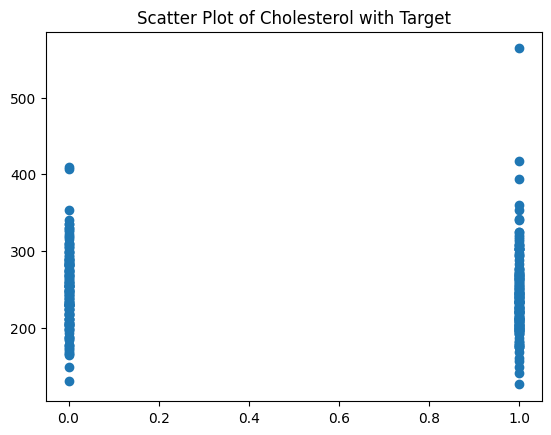

In [ ]:
plt.scatter(heart_data.target,heart_data.chol)
plt.title('Scatter Plot of Cholesterol with Target')


Check missing values


In [ ]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
heart_data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

Splitting the Features and Target

In [ ]:
X = heart_data.drop(columns='target')
Y = heart_data['target']

In [ ]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [ ]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


Splitting the Data into Training data & Test Data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=23)

In [ ]:
print( X_train)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
61    54    1   1       108   309    0        1      156      0      0.0   
83    52    1   3       152   298    1        1      178      0      1.2   
103   42    1   2       120   240    1        1      194      0      0.8   
160   56    1   1       120   240    0        1      169      0      0.0   
119   46    0   0       138   243    0        0      152      1      0.0   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
251   43    1   0       132   247    1        0      143      1      0.1   
167   62    0   0       140   268    0        0      160      0      3.6   
201   60    1   0       125   258    0        0      141      1      2.8   
281   52    1   0       128   204    1        1      156      1      1.0   
79    58    1   2       105   240    0        0      154      1      0.6   

     slope  ca  thal  
61       2   0     3  
83       1   0     3  
103      0   0    

In [ ]:
print( Y_train)

61     1
83     1
103    1
160    1
119    1
      ..
251    0
167    0
201    0
281    0
79     1
Name: target, Length: 242, dtype: int64


Model Training

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model Evaluation

Accuracy Score

In [ ]:
Y_test_predict = model.predict(X_test)


In [ ]:
print('Accuracy Score:', accuracy_score(Y_test, Y_test_predict))

Accuracy Score: 0.8524590163934426


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(Y_test,Y_test_predict)
print(confusion_matrix)

[[23  5]
 [ 4 29]]


Classification Report

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(Y_test,Y_test_predict))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84        28
           1       0.85      0.88      0.87        33

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [ ]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
